In [1]:
# Regression
# predict-> continous number
# ORDERED, GROUPED-> no missing values 
# X axis should be complete!
# X-axis is time-> regression -> TIME SERIES ANALYSIS 


In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
colnames = {1:"mpg",
2:"cylinders",
3:"displacement",
4:"horsepower",
5:"weight",
6:"acceleration",
7:"model_year",
8:"origin",
9:"car_name"}

In [4]:
columns = [value for k,value in colnames.items()] 

In [5]:
columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'car_name']

In [7]:
!ls
data = pd.read_csv('auto-mpg (1).data', comment='\t', sep=' ', na_values=['?'],
                   skipinitialspace=True, names=columns)

'auto-mpg (1).data'   sample_data


In [8]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


In [9]:
data = data.iloc[:,:-1].dropna()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [10]:
# all null values
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [11]:
data.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [12]:
# origin> city
# 1- , 2- , 3- mangalore
city_encoding = {1:'honolulu', 2:'chickmangalur', 3: 'mangalore'}
data.origin = data.origin.map(city_encoding)

In [13]:
data.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
388,26.0,4,156.0,92.0,2585.0,14.5,82,honolulu
389,22.0,6,232.0,112.0,2835.0,14.7,82,honolulu
390,32.0,4,144.0,96.0,2665.0,13.9,82,mangalore
391,36.0,4,135.0,84.0,2370.0,13.0,82,honolulu
392,27.0,4,151.0,90.0,2950.0,17.3,82,honolulu
393,27.0,4,140.0,86.0,2790.0,15.6,82,honolulu
394,44.0,4,97.0,52.0,2130.0,24.6,82,chickmangalur
395,32.0,4,135.0,84.0,2295.0,11.6,82,honolulu
396,28.0,4,120.0,79.0,2625.0,18.6,82,honolulu
397,31.0,4,119.0,82.0,2720.0,19.4,82,honolulu


In [14]:
# filter these values as categories instead
# One-Hot encoding-> column values-> converts them into columns

encoding = pd.get_dummies(data, columns=['origin'], prefix='was_at_')
encoding.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,was_at__chickmangalur,was_at__honolulu,was_at__mangalore
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
389,22.0,6,232.0,112.0,2835.0,14.7,82,0,1,0
390,32.0,4,144.0,96.0,2665.0,13.9,82,0,0,1
391,36.0,4,135.0,84.0,2370.0,13.0,82,0,1,0
392,27.0,4,151.0,90.0,2950.0,17.3,82,0,1,0
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,1,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,1,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,1,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,1,0


In [15]:
# normalization-> z-score
# z-score = (x-mean)/std [only for training-> and apply same assumptions to testing data]
stats = data.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [16]:
y = encoding.mpg
x = encoding.drop('mpg', axis=1)

y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [17]:
len(y)

392

In [18]:
stats = trainx.describe().T
x_new = x[x.was_at__honolulu == 1] # filter the data for 1 particular city!
x_new.head()
colnames = ['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']
x_new = x_new.loc[:, colnames]
x_new.head()

NameError: ignored

In [ ]:

trainx = x_new.sample(frac=0.80, random_state=42)
testx = x_new.drop(trainx.index)
stats = trainx.describe().T
mu = stats['mean']
sigma = stats['std']


In [ ]:
y.index

In [ ]:
xtrain = (trainx-mu)/sigma
xtrain.head()
xtest = (testx - mu)/sigma 
xtest.head()

In [ ]:

ytrain = y[xtrain.index]
ytest = y[xtest.index]

In [ ]:
xtest[:5]

In [ ]:
ytest[:5]

In [ ]:
testx = x_new.drop(allindexes)
testx = (testx - mu)/sigma
testx.head()

In [ ]:
len(testx)

In [ ]:
len(ytest)

In [ ]:
# TF-> Dense -> 
trainx.shape

In [ ]:
# single element input shape-> (1,6)
#ML with 

In [ ]:
# Not Normalized

In [19]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,honolulu
1,15.0,8,350.0,165.0,3693.0,11.5,70,honolulu
2,18.0,8,318.0,150.0,3436.0,11.0,70,honolulu
3,16.0,8,304.0,150.0,3433.0,12.0,70,honolulu
4,17.0,8,302.0,140.0,3449.0,10.5,70,honolulu
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,honolulu
394,44.0,4,97.0,52.0,2130.0,24.6,82,chickmangalur
395,32.0,4,135.0,84.0,2295.0,11.6,82,honolulu
396,28.0,4,120.0,79.0,2625.0,18.6,82,honolulu


In [22]:
# Linear Regression Model-> univariate, multivariate 
# pick feature with most variation wrt y
# y= mpg!
cnames = data.columns
for cname in cnames:
  print(cname)
  print(len(data[cname].value_counts()))

mpg
127
cylinders
5
displacement
81
horsepower
93
weight
346
acceleration
95
model_year
13
origin
3


In [24]:
(data.describe().T)['std']

mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
model_year        3.683737
Name: std, dtype: float64

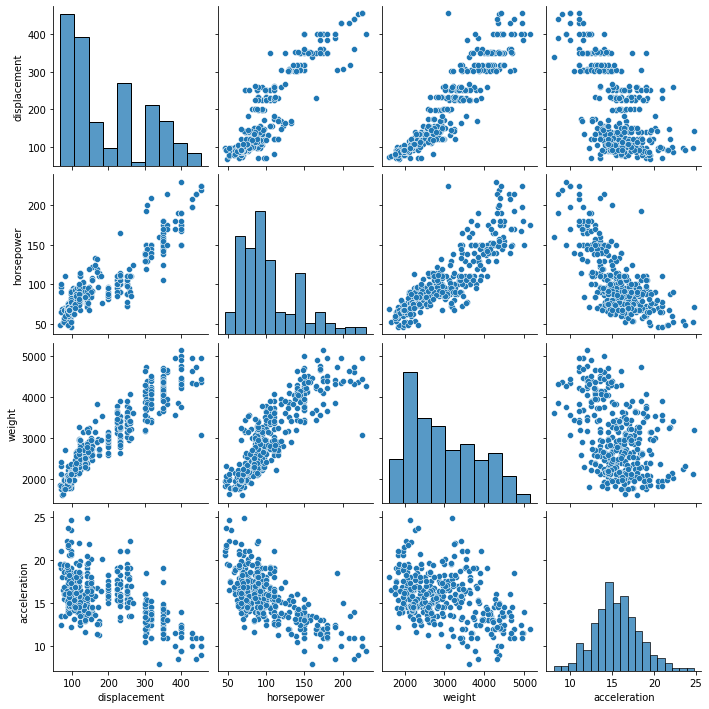

In [27]:
import seaborn as sns
sns.pairplot(data[['displacement','horsepower','weight','acceleration']])

In [31]:
x = data.horsepower
x.head()


0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64

In [32]:
y = data.mpg
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [33]:
traindata = data.sample(frac=0.80, random_state=42)
allindexes = traindata.index
testdata = data.drop(allindexes)
traindata.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
79,26.0,4,96.0,69.0,2189.0,18.0,72,chickmangalur
276,21.6,4,121.0,115.0,2795.0,15.7,78,chickmangalur
248,36.1,4,91.0,60.0,1800.0,16.4,78,mangalore
56,26.0,4,91.0,70.0,1955.0,20.5,71,honolulu
393,27.0,4,140.0,86.0,2790.0,15.6,82,honolulu


In [34]:
testdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
1,15.0,8,350.0,165.0,3693.0,11.5,70,honolulu
13,14.0,8,455.0,225.0,3086.0,10.0,70,honolulu
20,25.0,4,110.0,87.0,2672.0,17.5,70,chickmangalur
21,24.0,4,107.0,90.0,2430.0,14.5,70,chickmangalur
35,17.0,6,250.0,100.0,3329.0,15.5,71,honolulu


In [43]:
trainx = traindata.loc[:,['cylinders','displacement','horsepower','acceleration']]
trainy = traindata.mpg
testx = testdata.loc[:,['cylinders','displacement','horsepower','acceleration']]
testy = testdata.mpg 

In [44]:
trainx2 = traindata.loc[:,['horsepower']]
trainy2 = traindata.mpg
testx2 = testdata.horsepower
testy2 = testdata.mpg 

In [39]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(trainx))

In [40]:
normalizer.mean.numpy()

array([  5.531847, 197.8551  , 105.971344,  15.510828], dtype=float32)

In [45]:
hpnormalizer = preprocessing.Normalization(input_shape=[1,])
hpnormalizer.adapt(trainx2)

In [47]:
singlemodel = tf.keras.Sequential([
                                   hpnormalizer,
                                   keras.layers.Dense(1)
]
)

In [48]:
singlemodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [50]:
ypredicted = singlemodel.predict(data.horsepower[:5])

In [55]:
ypredicted
trainx2

,horsepower
79,69.0
276,115.0
248,60.0
56,70.0
393,86.0
...,...
218,58.0
281,85.0
342,84.0
238,83.0


In [61]:
singlemodel.compile(optimizer='adam', loss= 'mean_absolute_error')
trainx2_2 = np.array(trainx2)

In [62]:
history = singlemodel.fit(trainx2_2, trainy2, epochs=100, validation_split=0.1)

Epoch 1/100
9/9 [==============================] - 0s 15ms/step - loss: 21.8295 - val_loss: 20.6411
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 21.8205 - val_loss: 20.6325
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 21.8114 - val_loss: 20.6237
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 21.8024 - val_loss: 20.6149
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 21.7934 - val_loss: 20.6064
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 21.7843 - val_loss: 20.5979
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 21.7753 - val_loss: 20.5892
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 21.7662 - val_loss: 20.5804
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 21.7572 - val_loss: 20.5718
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 21.7481 - val_loss: 20.5633
Epoch 11

In [66]:
xtest2_2 = np.array(testx2)
ypred = singlemodel.predict(xtest2_2)

In [67]:
ypred

array([[ 0.21154046],
       [-1.9529729 ],
       [ 3.0254078 ],
       [ 2.9171822 ],
       [ 2.55643   ],
       [-0.14921165],
       [ 3.0614831 ],
       [ 2.9171822 ],
       [ 3.6386867 ],
       [ 3.8190627 ],
       [ 3.6747618 ],
       [ 3.9994388 ],
       [ 4.21589   ],
       [ 0.752669  ],
       [ 2.8450317 ],
       [ 1.2216468 ],
       [ 0.752669  ],
       [ 0.4640671 ],
       [ 2.9893327 ],
       [ 0.752669  ],
       [-0.3295877 ],
       [ 2.55643   ],
       [ 2.1956778 ],
       [ 3.4583106 ],
       [ 1.1134212 ],
       [ 3.7469125 ],
       [ 2.3760538 ],
       [ 2.1956778 ],
       [ 2.7368062 ],
       [ 3.1697087 ],
       [ 2.7007308 ],
       [ 2.9171822 ],
       [ 1.8349257 ],
       [ 0.6805185 ],
       [ 2.55643   ],
       [ 2.3760538 ],
       [ 3.2418592 ],
       [ 3.6026115 ],
       [ 2.4842796 ],
       [ 1.4741734 ],
       [ 3.7108371 ],
       [ 2.7007308 ],
       [ 3.8912132 ],
       [ 2.1956778 ],
       [ 3.7829876 ],
       [ 2

In [68]:
testy

1      15.0
13     14.0
20     25.0
21     24.0
35     17.0
       ... 
381    36.0
388    26.0
391    36.0
395    32.0
397    31.0
Name: mpg, Length: 78, dtype: float64

In [69]:
dnnmodel = tf.keras.Sequential([
                                   hpnormalizer,
                                  keras.layers.Dense(16, activation='relu'),
                                keras.layers.Dense(32, activation='relu'),
                                   keras.layers.Dense(1)
]
)

In [70]:
dnnmodel.compile(optimizer='adam', loss= 'mean_absolute_error')
dnnhistory = dnnmodel.fit(trainx2_2, trainy2, epochs=100, validation_split=0.1)

Epoch 1/100
9/9 [==============================] - 1s 16ms/step - loss: 23.3696 - val_loss: 21.8131
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 23.2632 - val_loss: 21.7123
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 23.1654 - val_loss: 21.6077
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 23.0583 - val_loss: 21.4886
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 22.9337 - val_loss: 21.3521
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 22.7920 - val_loss: 21.2006
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 22.6311 - val_loss: 21.0337
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 22.4547 - val_loss: 20.8463
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 22.2548 - val_loss: 20.6287
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 22.0195 - val_loss: 20.3823
Epoch 11

In [71]:
y2pred = dnnmodel.predict(xtest2_2)

In [72]:
y2pred

array([[14.126186],
       [15.232847],
       [25.789581],
       [24.978294],
       [22.274021],
       [14.232372],
       [26.060009],
       [24.978294],
       [30.387577],
       [31.780373],
       [30.666134],
       [33.173176],
       [34.844532],
       [14.016552],
       [24.437443],
       [14.49239 ],
       [14.016552],
       [14.051858],
       [25.519152],
       [14.016552],
       [14.285465],
       [22.274021],
       [19.569744],
       [29.034712],
       [14.350507],
       [31.223255],
       [20.921883],
       [19.569744],
       [23.62616 ],
       [26.871292],
       [23.35573 ],
       [24.978294],
       [16.865467],
       [13.994912],
       [22.274021],
       [20.921883],
       [27.412144],
       [30.11642 ],
       [21.733164],
       [14.875917],
       [30.944696],
       [23.35573 ],
       [32.337494],
       [19.569744],
       [31.501812],
       [23.62616 ],
       [26.330435],
       [26.330435],
       [16.865467],
       [14.350507],
